In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [ ]:
def image_threshold(f, L):
    f_tr = np.ones(f.shape).astype(np.uint8)
    f_tr[np.where(f < L)] = 0
    # print(f_tr)
    return f_tr

In [ ]:
def image_histogram(img, bins=256, range=(0,256)):
  hist,_ = np.histogram(img, bins=256, range=(0,256))
  # print(hist)
  return hist 

In [ ]:
def otsu_threshold(img, max_L=255):
    f_min = np.inf
    t_opt = -1
    n_pixels = np.product(img.shape)

    hist_t = image_histogram(img)
    
    img_t = image_threshold(img, 0)
    
    for L in range(1, max_L):
        img_ti = image_threshold(img, L)
        img_0 = img[np.where(img_ti == 0)]
        img_1 = img[np.where(img_ti == 1)]
        if img_0.size == 0 or img_1.size == 0:
          continue
        g1 = np.var(img_0) 
        g2 = np.var(img_1)
        q1 = np.sum(hist_t[:L])/float(n_pixels)
        q2 = np.sum(hist_t[L:])/float(n_pixels)

        f = q1*g1 + q2*g2
        if f < f_min:
          f_min = f
          t_opt = L
    
    img_t = image_threshold(img, t_opt)
    
    return img_t, t_opt

In [ ]:
def apply_alg(img_path):
  # Read image
  img = imageio.imread(img_path)
  hist_img = image_histogram(img)

  # Try Mean intensity Threshold
  mean_t = np.mean(img)
  img_t  = image_threshold(img, mean_t)
  hist_t = image_histogram(img)

  # Try Otsu Threshold
  img_o, t_opt = otsu_threshold(img)
  hist_o = image_histogram(img)

  plt.figure(figsize=(10,15))
  plt.subplot(321); plt.imshow(img,cmap="gray");
  plt.axis('off')
  plt.subplot(322); plt.bar(np.arange(0,256), hist_img, alpha=0.7)
  plt.subplot(323); plt.imshow(img_t, cmap="gray")
  plt.axis('off')
  plt.title('Threshold with Mean intensity (%.2f)' % (mean_t))
  plt.subplot(324); plt.bar(np.arange(0,256), hist_t, alpha=0.7)
  plt.subplot(325); plt.imshow(img_o, cmap="gray"); plt.axis('off')
  plt.title('Otsu (optimal) threshold (%d)' % (t_opt))
  plt.subplot(326); plt.bar(np.arange(0,256), hist_o, alpha=0.7)


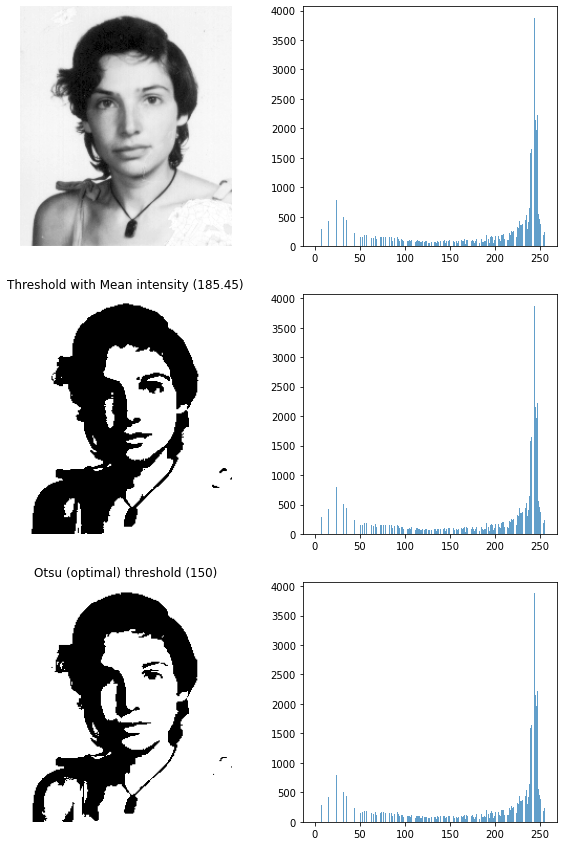

In [ ]:
apply_alg("julia.png")

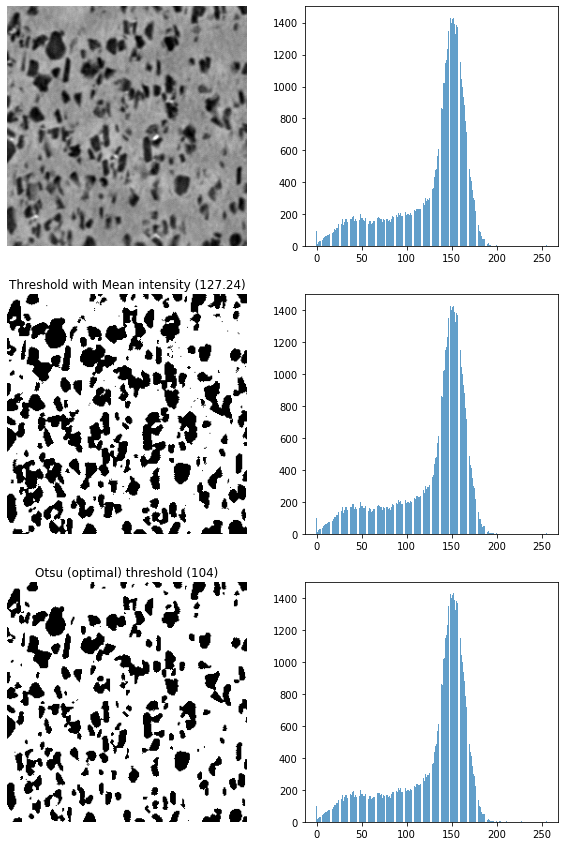

In [ ]:
apply_alg("aluminium.png")

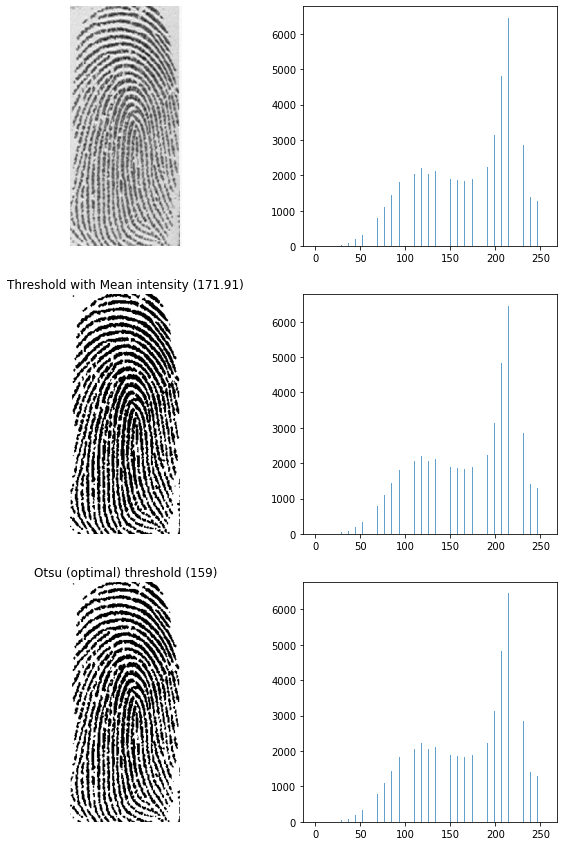

In [ ]:
apply_alg("finger.png")

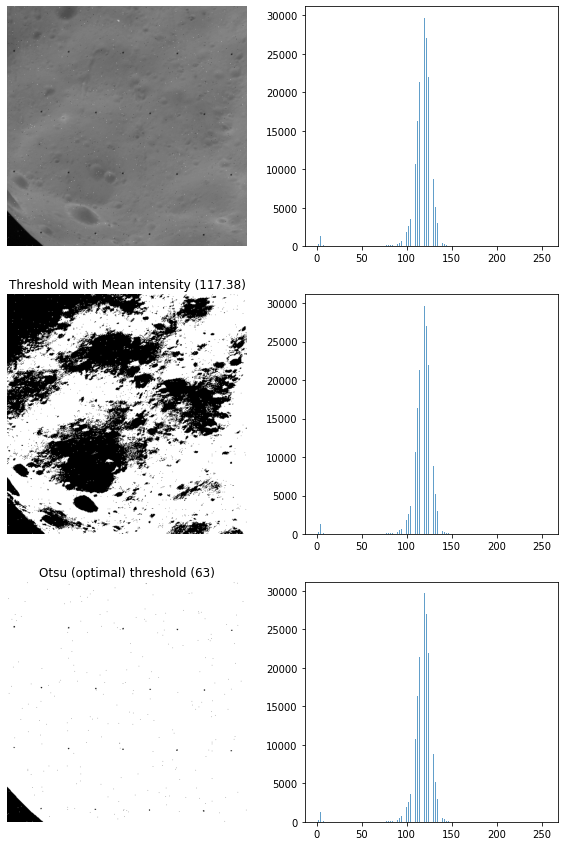

In [ ]:
apply_alg("phobos.png")